In [757]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as SM
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings 
filterwarnings("ignore")

### Problem 1: Linear Regression


You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).

Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

The data dictionary is given below.

# Data Dictionary:

Variable Name	Description

Carat	  =   Carat weight of the cubic zirconia.

Cut	      =  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Colour 	  =   Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	  =  Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price)              IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth	  =  The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	  =  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	  =  the Price of the cubic zirconia.

X	      =  Length of the cubic zirconia in mm.

Y	      =  Width of the cubic zirconia in mm.

Z	      = Height of the cubic zirconia in mm.

In [758]:
df=pd.read_csv('cubic_zirconia.csv')

In [759]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


### 1.The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. Since this is a regression problem, the dependence of the response on the predictors needs to be thoroughly investigated.

#### Exploratory Data Analysis

In [760]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [761]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [762]:
# REmove the unammed 0 columns as its of no use.
df1=df.drop('Unnamed: 0',axis=1)
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [763]:
#shape of the dataframe

print('Number of rows:',df1.shape[0],'\nNumber of columns:',df1.shape[1])

Number of rows: 26967 
Number of columns: 10


In [764]:
#Basic information

df1.info()

#Describe the data
df1.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [765]:
#unique value
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [766]:
#missing values
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [767]:
#imputing the missing values
for column in df1.columns:
    if df1[column].dtype == 'float64':
        median = df1[column].median()
        df1[column] = df1[column].fillna(median)    
        
df1.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [768]:
#Find the duplicates

df1.duplicated().sum()

34

In [769]:
print('Before',df1.shape)
df1.drop_duplicates(inplace=True) 
print('After',df1.shape)

Before (26967, 10)
After (26933, 10)


In [770]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [771]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


#### Univariate Analysis of Continuous and Categorical variables

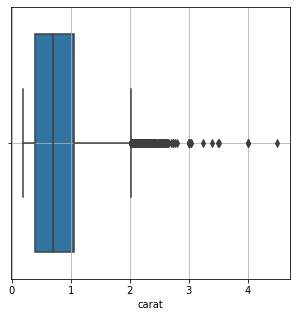

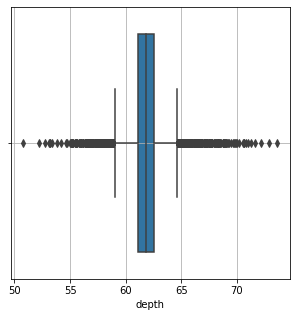

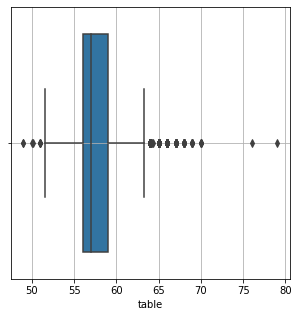

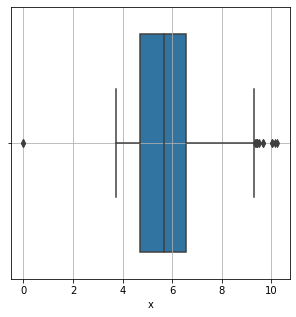

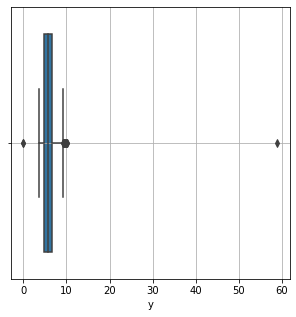

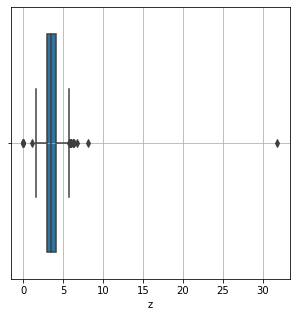

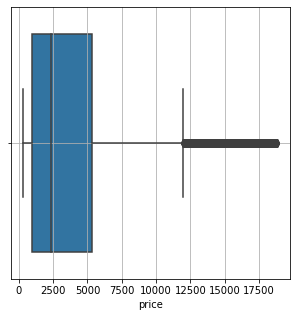

In [772]:

cont_cols = ['carat','depth','table','x','y','z','price']
for i in cont_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(df1[i],whis=1.5)
    plt.grid()
    plt.show();

#### Treating the outliers.

In [773]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [774]:
lr,ur=remove_outlier(df1['carat'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['carat']=np.where(df1['carat']>ur,ur,df1['carat'])
df1['carat']=np.where(df1['carat']<lr,lr,df1['carat'])
print('')

lr,ur=remove_outlier(df1['depth'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['depth']=np.where(df1['depth']>ur,ur,df1['depth'])
df1['depth']=np.where(df1['depth']<lr,lr,df1['depth'])
print('')

lr,ur=remove_outlier(df1['table'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['table']=np.where(df1['table']>ur,ur,df1['table'])
df1['table']=np.where(df1['table']<lr,lr,df1['table'])
print('')

lr,ur=remove_outlier(df1['x'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['x']=np.where(df1['x']>ur,ur,df1['x'])
df1['x']=np.where(df1['x']<lr,lr,df1['x'])
print('')

lr,ur=remove_outlier(df1['y'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['y']=np.where(df1['y']>ur,ur,df1['y'])
df1['y']=np.where(df1['y']<lr,lr,df1['y'])
print('')

lr,ur=remove_outlier(df1['z'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['z']=np.where(df1['z']>ur,ur,df1['z'])
df1['z']=np.where(df1['z']<lr,lr,df1['z'])
print('')

lr,ur=remove_outlier(df1['price'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['price']=np.where(df1['price']>ur,ur,df1['price'])
df1['price']=np.where(df1['price']<lr,lr,df1['price'])
print('')


Lower Range : -0.5750000000000001 
Upper Range : 2.0250000000000004

Lower Range : 59.0 
Upper Range : 64.6

Lower Range : 51.5 
Upper Range : 63.5

Lower Range : 1.9500000000000002 
Upper Range : 9.309999999999999

Lower Range : 1.9649999999999999 
Upper Range : 9.285

Lower Range : 1.1899999999999997 
Upper Range : 5.75

Lower Range : -5671.5 
Upper Range : 11972.5



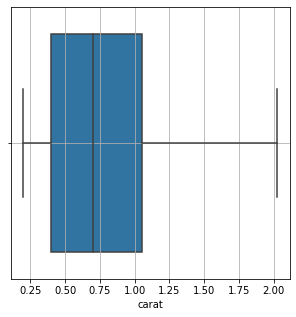

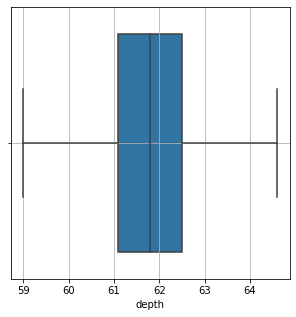

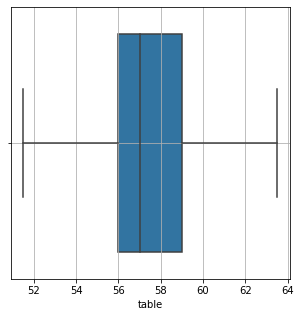

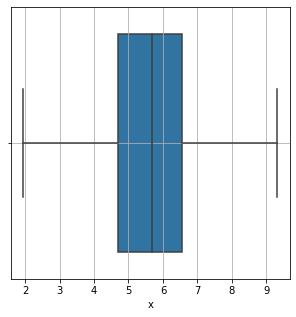

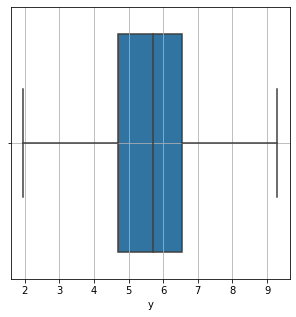

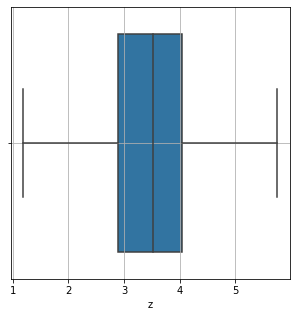

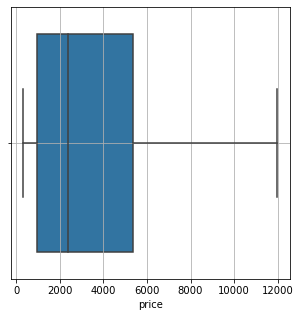

In [775]:
cont_cols = ['carat','depth','table','x','y','z','price']
for i in cont_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(df1[i],whis=1.5)
    plt.grid()
    plt.show();

#### Skew

In [776]:
df1.skew(axis = 0, skipna = True)

carat    0.917162
depth   -0.194653
table    0.480121
x        0.395196
y        0.391510
z        0.384522
price    1.157688
dtype: float64

### Checking the spread of the data using countplot for the categorical variables.

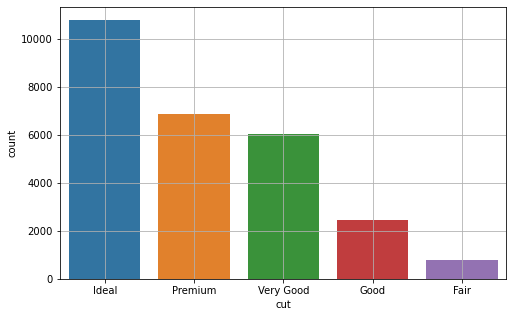

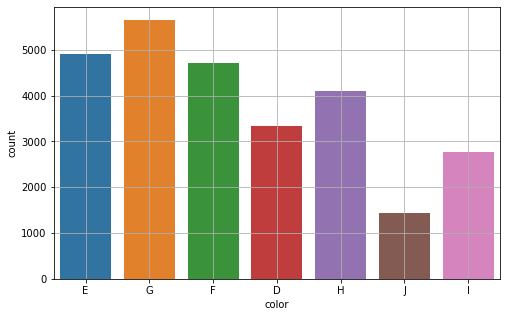

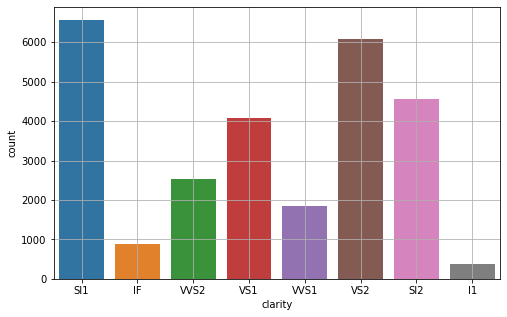

In [777]:
cols = ['cut','color','clarity']
for i in cols:
    plt.figure(figsize=(8,5))
    sns.countplot(df1[i])
    plt.grid()
    plt.show();

#### Bivariate Analysis

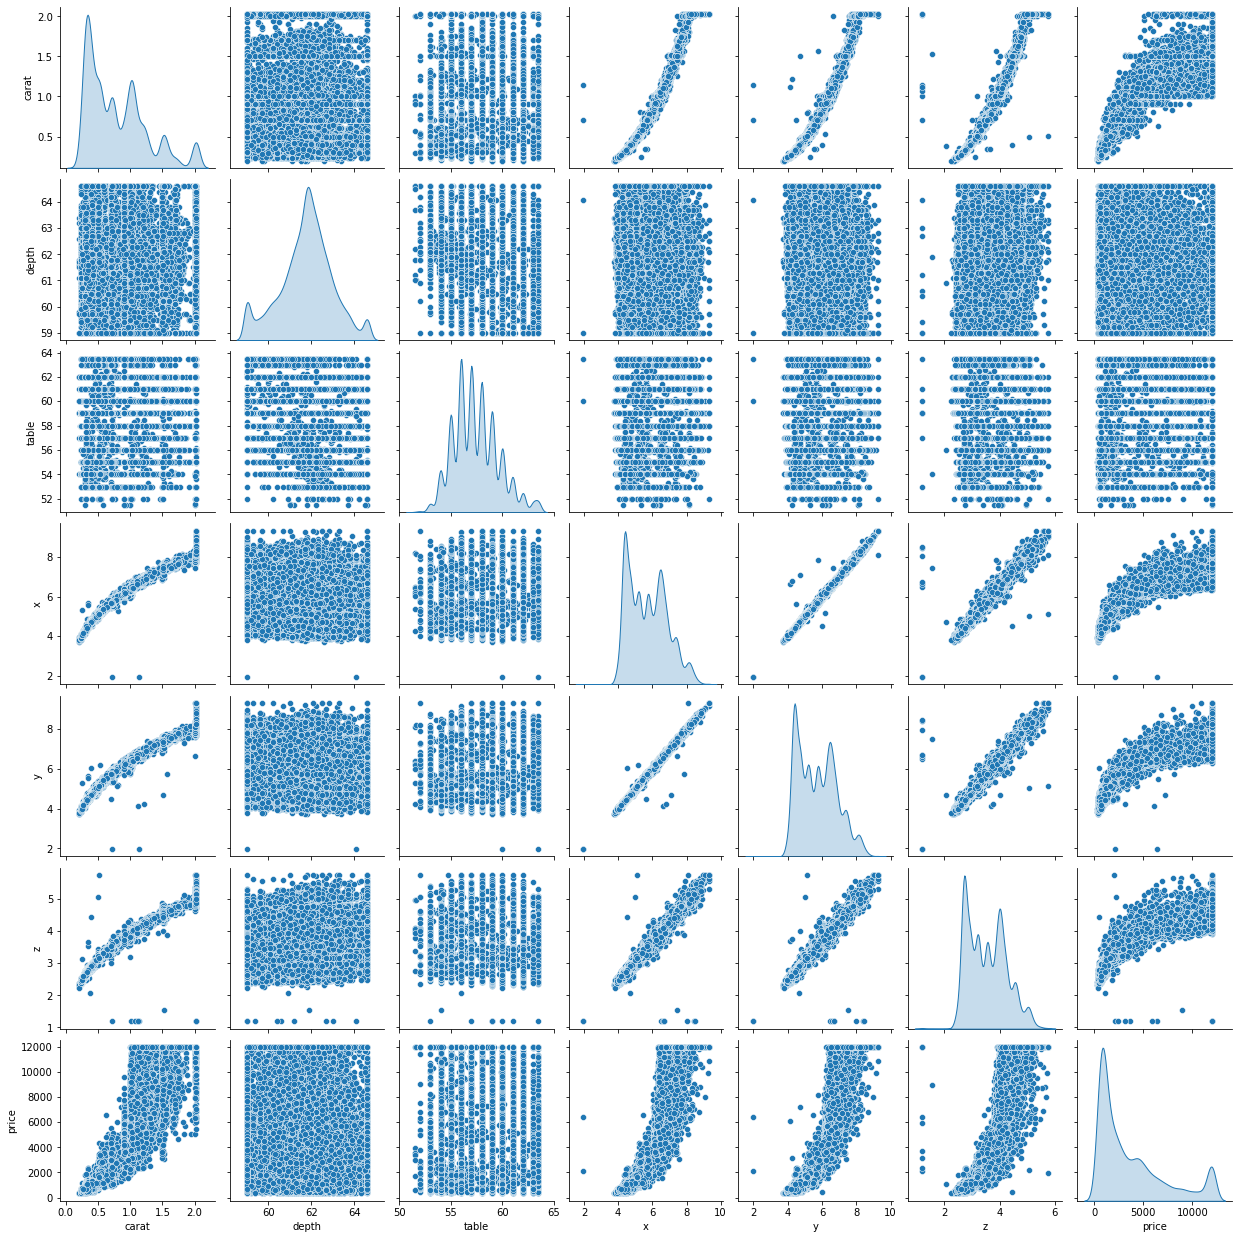

In [778]:
df1b = (df1[cont_cols])
sns.pairplot(df1b, diag_kind='kde')  
plt.show()

### Correlation

In [779]:
cor=df1.corr()
cor

,carat,depth,table,x,y,z,price
carat,1.000000,0.029433,0.187143,0.982387,0.981464,0.977508,0.936762
depth,0.029433,1.000000,-0.289357,-0.019848,-0.022884,0.095253,-0.001060
table,0.187143,-0.289357,1.000000,0.199061,0.193428,0.159380,0.137880
x,0.982387,-0.019848,0.199061,1.000000,0.998491,0.988168,0.912933
y,0.981464,-0.022884,0.193428,0.998491,1.000000,0.987841,0.914361
z,0.977508,0.095253,0.159380,0.988168,0.987841,1.000000,0.905866
price,0.936762,-0.001060,0.137880,0.912933,0.914361,0.905866,1.000000


#### Carat vs Price

<AxesSubplot:xlabel='carat', ylabel='price'>

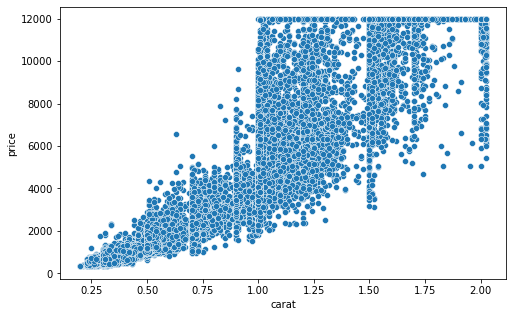

In [780]:
plt.figure(figsize=(8,5))
sns.scatterplot(df1['carat'],df1['price'])

#### Depth vs Price

<AxesSubplot:xlabel='depth', ylabel='price'>

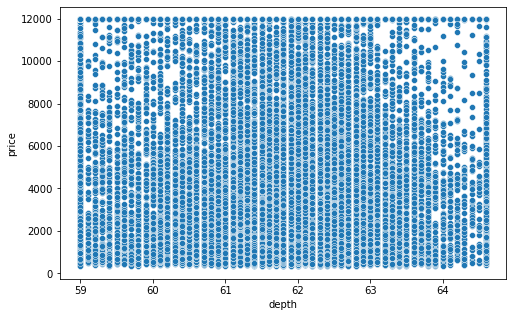

In [781]:
plt.figure(figsize=(8,5))
sns.scatterplot(df1['depth'],df1['price'])

#### X vs Price

<AxesSubplot:xlabel='x', ylabel='price'>

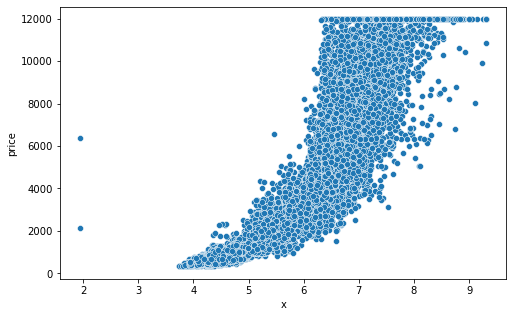

In [782]:
plt.figure(figsize=(8,5))
sns.scatterplot(df1['x'],df1['price'])

#### Y vs Price

<AxesSubplot:xlabel='y', ylabel='price'>

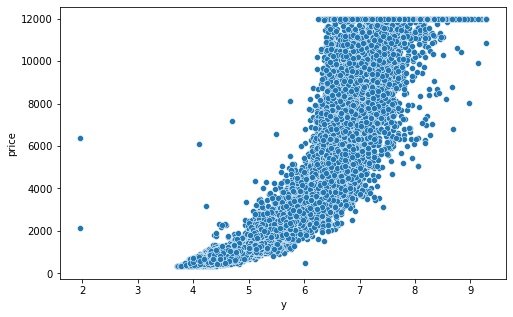

In [783]:
plt.figure(figsize=(8,5))
sns.scatterplot(df1['y'],df1['price'])

#### Z vs Price

<AxesSubplot:xlabel='z', ylabel='price'>

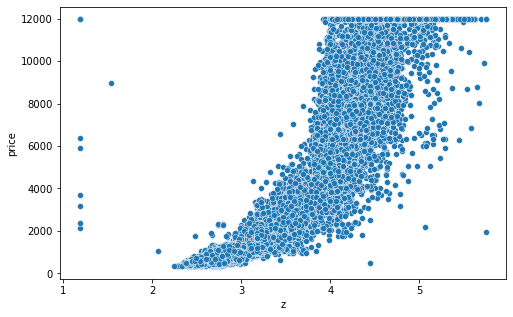

In [784]:
plt.figure(figsize=(8,5))
sns.scatterplot(df1['z'],df1['price'])

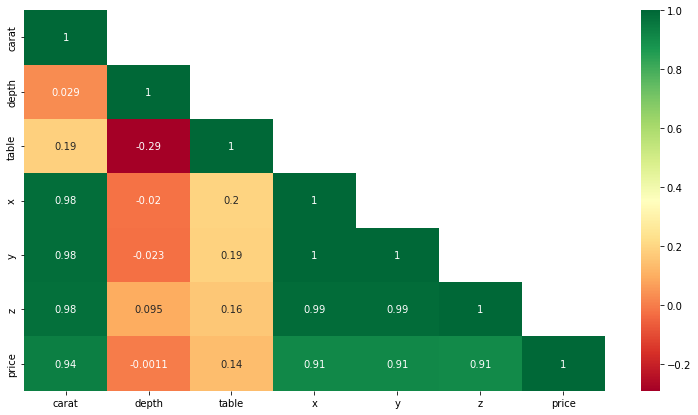

In [785]:
#Correlation plot

plt.figure(figsize=(13,7))

sns.heatmap(cor,annot=True,mask=np.triu(cor,+1),cmap='RdYlGn');

The matrix clearly shows the presence of multi collinearity in the dataset

# Conclusion of EDA

Price – This variable gives the continuous output with the price. This will be our Target Variable.
 
Carat, depth, table, x, y, z variables are numerical or continuous variables.

Cut, Clarity and colour are categorical variables.
 
our study which leaves the shape of the dataset with 26967 rows & 10 Columns.

Only in depth 697missing values are present which we will impute by its median values.


### 2.Build various iterations of the Linear Regression model using appropriate variable selection techniques for the full data.
Use Full Data to develop a model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

In [786]:
#Getting unique counts of all Objects.
print('cut\n',df1.cut.value_counts())
print('\n')
print('color\n',df1.color.value_counts())
print('\n')
print('clarity\n',df1.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
 G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




In [787]:
#Converting objects to categorical codes.

cut

In [788]:
## We are coding up the 'cut' variable in an ordinal manner
df1['cut']=np.where(df1['cut']=='Ideal','2',df1['cut'])
df1['cut']=np.where(df1['cut']=='Premium','2',df1['cut'])

df1['cut']=np.where(df1['cut']=='Good','1',df1['cut'])
df1['cut']=np.where(df1['cut']=='Very Good','1',df1['cut'])

df1['cut']=np.where(df1['cut']=='Fair','0',df1['cut'])

clarity

In [789]:

df1['clarity']=np.where(df1['clarity']=='I1','Best',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='SI1','VGood',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='SI2','VGood',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='VS1','Good',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VS2','Good',df1['clarity'])


df1['clarity']=np.where(df1['clarity']=='VVS1','Bad',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VVS2','Bad',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='IF','Worst',df1['clarity'])

In [790]:
df1['clarity']=np.where(df1['clarity']=='Best','4',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='VGood','3',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='Good','2',df1['clarity'])


df1['clarity']=np.where(df1['clarity']=='Bad','1',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='Worst','0',df1['clarity'])

color

In [791]:
df1['color']=np.where(df1['color']=='J','Best',df1['color'])

df1['color']=np.where(df1['color']=='I','VGood',df1['color'])
df1['color']=np.where(df1['color']=='H','VGood',df1['color'])

df1['color']=np.where(df1['color']=='G','Good',df1['color'])
df1['color']=np.where(df1['color']=='F','Good',df1['color'])

df1['color']=np.where(df1['color']=='E','Bad',df1['color'])

df1['color']=np.where(df1['color']=='D','Worst',df1['color'])


In [792]:
df1['color']=np.where(df1['color']=='Best','4',df1['color'])

df1['color']=np.where(df1['color']=='VGood','3',df1['color'])

df1['color']=np.where(df1['color']=='Good','2',df1['color'])

df1['color']=np.where(df1['color']=='Bad','1',df1['color'])

df1['color']=np.where(df1['color']=='Worst','0',df1['color'])


In [793]:
df1.dtypes # The'cut','color','clarity' column still showing as 'Object'.

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [794]:
# converting the'cut','color','clarity' column from object / string type to float.

df1['cut'] = df1['cut'].astype('int64')
df1['color'] = df1['color'].astype('int64')
df1['clarity'] = df1['clarity'].astype('int64')
df1.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [795]:
df_dummy = pd.get_dummies(df1, columns=['clarity'])

In [796]:
df_dummy.head()

,carat,cut,color,depth,table,x,y,z,price,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4
0,0.30,2,1,62.1,58.0,4.27,4.29,2.66,499.0,0,0,0,1,0
1,0.33,2,2,60.8,58.0,4.42,4.46,2.70,984.0,1,0,0,0,0
2,0.90,1,1,62.2,60.0,6.04,6.12,3.78,6289.0,0,1,0,0,0
3,0.42,2,2,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,0,0
4,0.31,2,2,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0


In [797]:
X=df_dummy.drop('price',axis=1)
Y=df_dummy[['price']]

In [798]:
#check for Multicolinearity 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [799]:
vif_cal(input_data=df_dummy[[ 'carat','cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x',
       'y', 'z', 'price']])

carat  VIF =  331.65
cut  VIF =  331.65
color  VIF =  331.65
clarity_0  VIF =  331.65
clarity_1  VIF =  331.65
clarity_2  VIF =  331.65
clarity_3  VIF =  331.65
clarity_4  VIF =  331.65
depth  VIF =  331.65
table  VIF =  331.65
x  VIF =  331.65
y  VIF =  331.65
z  VIF =  331.65
price  VIF =  331.65


### Building a base model with all the features

In [803]:
df_dummy.columns

Index(['carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z', 'price',
       'clarity_0', 'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4'],
      dtype='object')

In [804]:
#Base Model 
f_1 = 'price~carat+cut+color+clarity_0+clarity_1+clarity_2+clarity_3+clarity_4+depth+table+x+y+z'

In [805]:
model_1 = SM.ols(f_1,data=df_dummy).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.979e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:09   Log-Likelihood:            -2.2195e+05
No. Observations:               26933   AIC:                         4.439e+05
Df Residuals:                   26920   BIC:                         4.440e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1256.6028    480.359      2.616      0.009     315.073    2198.132
carat       8728.4221     68.185    128.011      0.000    8594.776    8862.068
cut          188.6361     11.831     15.944      0.000     165.447     211.825
color       -386.9550      5.492    -70.452      0.000    -397.721    -376.189
clarity_0   1642.9248     98.277     16.717      0.000    1450.296    1835.554
clarity_1   1408.1692     96.554     14.584      0.000    1218.919    1597.420
clarity_2    805.0389     97.147      8.287      0.000     614.625     995.453
clarity_3   -157.4673     97.925     -1.608      0.108    -349.406      34.472
clarity_4  -2442.0629    105.584    -23.129      0.000   -2649.013   -2235.113
depth        -14.8724      7.634     -1.948      0.051     -29.836       0.092
table        -25.5486      3.032     -8.426      0.000     -31.492     -19.605
x          -1496.6947     99.029    -15.114      0.000   -1690.796   -1302.593
y           1302.7690     97.637     13.343      0.000    1111.396    1494.142
z           -282.6023     82.225     -3.437      0.001    -443.767    -121.437
==============================================================================
Omnibus:                     5531.122   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16723.084
Skew:                           1.065   Prob(JB):                         0.00
Kurtosis:                       6.220   Cond. No.                     1.39e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.99e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### .Building 2nd iteration removing 'y' as p-value>0.05

In [806]:
f_2 ='price~carat+cut+color+clarity_0+clarity_1+clarity_2+clarity_3+clarity_4+depth+table+x+z'

In [807]:
model_2 = SM.ols(f_2,data=df_dummy).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.227e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:10   Log-Likelihood:            -2.2204e+05
No. Observations:               26933   AIC:                         4.441e+05
Df Residuals:                   26921   BIC:                         4.442e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3226.9665    458.599      7.037      0.000    2328.089    4125.843
carat       8781.2335     68.293    128.581      0.000    8647.375    8915.092
cut          159.8091     11.670     13.694      0.000     136.935     182.683
color       -387.7263      5.510    -70.365      0.000    -398.527    -376.926
clarity_0   2057.5587     93.541     21.996      0.000    1874.213    2240.904
clarity_1   1818.0238     91.838     19.796      0.000    1638.017    1998.031
clarity_2   1207.1576     92.658     13.028      0.000    1025.544    1388.771
clarity_3    241.2205     93.562      2.578      0.010      57.835     424.606
clarity_4  -2096.9942    102.704    -20.418      0.000   -2298.299   -1895.689
depth        -44.3476      7.332     -6.049      0.000     -58.718     -29.977
table        -32.2164      3.001    -10.737      0.000     -38.098     -26.335
x           -396.0711     54.976     -7.204      0.000    -503.827    -288.316
z             -0.3495     79.718     -0.004      0.997    -156.601     155.902
==============================================================================
Omnibus:                     5467.329   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16861.885
Skew:                           1.046   Prob(JB):                         0.00
Kurtosis:                       6.263   Cond. No.                     1.42e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Building 3nd iteration removing 'Z' as p-value>0.05

In [808]:
f_3 ='price~carat+cut+color+clarity_0+clarity_1+clarity_2+clarity_3+clarity_4+depth+table+x'

In [809]:
model_3 = SM.ols(f_3,data=df_dummy).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.550e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:11   Log-Likelihood:            -2.2204e+05
No. Observations:               26933   AIC:                         4.441e+05
Df Residuals:                   26922   BIC:                         4.442e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3228.0094    392.058      8.234      0.000    2459.556    3996.463
carat       8781.2151     68.163    128.827      0.000    8647.612    8914.818
cut          159.8126     11.642     13.728      0.000     136.994     182.631
color       -387.7260      5.510    -70.369      0.000    -398.526    -376.926
clarity_0   2057.7662     80.687     25.503      0.000    1899.615    2215.918
clarity_1   1818.2317     78.642     23.121      0.000    1664.090    1972.373
clarity_2   1207.3660     79.528     15.182      0.000    1051.487    1363.245
clarity_3    241.4295     80.502      2.999      0.003      83.642     399.217
clarity_4  -2096.7840     90.831    -23.084      0.000   -2274.818   -1918.751
depth        -44.3694      5.392     -8.228      0.000     -54.939     -33.800
table        -32.2155      2.993    -10.763      0.000     -38.082     -26.348
x           -396.2783     28.108    -14.098      0.000    -451.372    -341.185
==============================================================================
Omnibus:                     5467.320   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16861.833
Skew:                           1.046   Prob(JB):                         0.00
Kurtosis:                       6.263   Cond. No.                     1.41e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.63e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [810]:
#Re-check for Multicolinearity 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [811]:
vif_cal(input_data=df_dummy[[ 'cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x'
       ]])

cut  VIF =  1.01
color  VIF =  1.07
clarity_0  VIF =  1.02
clarity_1  VIF =  1.06
clarity_2  VIF =  1.01
clarity_3  VIF =  1.08
clarity_4  VIF =  1.01
depth  VIF =  1.0
table  VIF =  1.04
x  VIF =  inf


In [812]:
#Using the last best model 
model_3_pred = model_3.fittedvalues
model_3_pred

0        -280.241006
1        1410.044509
2        5635.197209
3        1220.377845
4        1008.157509
            ...     
26962    5508.652147
26963    1062.233010
26964    2210.661885
26965     595.030098
26966    5860.960279
Length: 26933, dtype: float64

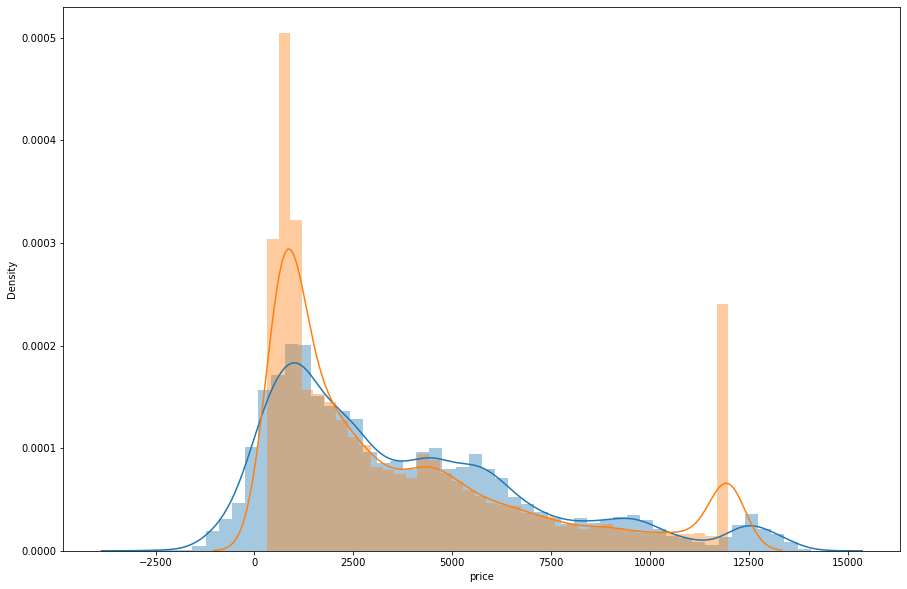

In [813]:
plt.figure(figsize = (15,10))
sns.distplot(model_3.fittedvalues)
sns.distplot(df1['price']);

<AxesSubplot:>

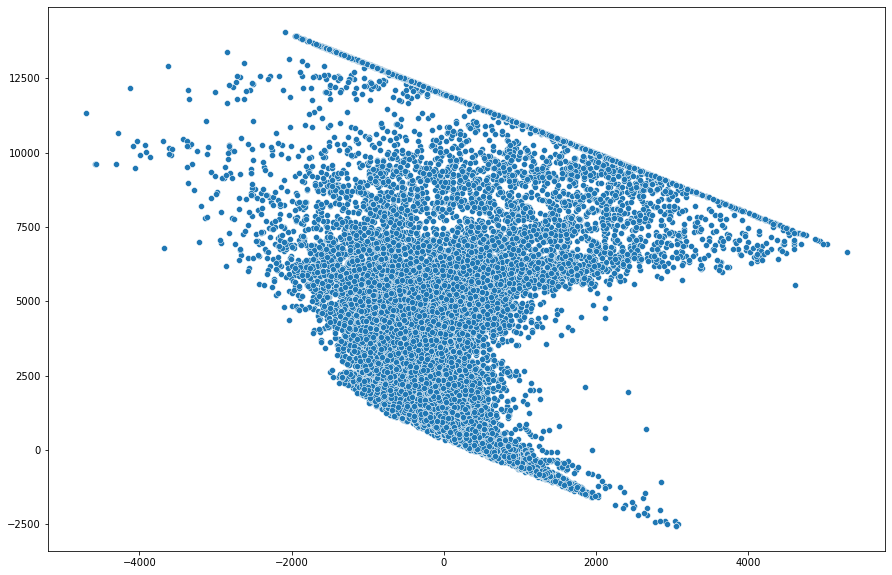

In [814]:
#Linear Relationship b/w Dependent and Independent Varaibles 
plt.figure(figsize = (15,10))
sns.scatterplot(model_3.resid,model_3.fittedvalues)

### 3.Split the data into training (70%) and test (30%). Build the various iterations of the Linear Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.
If prediction accuracy of the price is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (II) to compare accuracy in training and test sets. Compare the final model of Part (II) and the proposed one in Part (III). Which model provides the most accurate prediction? If the model found in Part (II) is different from the proposed model in Part (III), give an explanation.

In [815]:

lr = LinearRegression()

Best Model vs Base Model

In [816]:
# Split X and Y into 70 :30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [817]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

#### Base Model building using sklearn Linear Regression

In [818]:
model_base = lr.fit(X_train[[ 'carat','cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x',
       'y', 'z']],Y_train)

In [819]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[[ 'carat','cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x',
       'y', 'z']])

In [820]:
#Test Data Prediction

model_base_test = model_base.predict(X_test[[ 'carat','cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x',
       'y', 'z']])

In [821]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(Y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(Y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 923.42
Test Data RMSE of model_base: 905.12


In [822]:
resultDf_trn = pd.DataFrame({'RMSE Training Data':[RMSE_Train_base],'RMSE Test Data':[RMSE_Test_base]},index=['Base Model'])
resultDf_trn

,RMSE Training Data,RMSE Test Data
Base Model,923.42,905.12


#### Best Model building using sklearn Linear Regression

In [823]:
model_best = lr.fit(X_train[['carat','cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x']],Y_train)

In [824]:
#Training Data Prediction

model_best_train = model_best.predict(X_train[['carat','cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x']])

In [825]:
#Test Data Prediction

model_best_test = model_best.predict(X_test[['carat','cut','color','clarity_0','clarity_1','clarity_2','clarity_3','clarity_4','depth', 'table', 'x']])

In [826]:
RMSE_Train_best = np.round(np.sqrt(mean_squared_error(Y_train,model_best_train)),2)
RMSE_Test_best = np.round(np.sqrt(mean_squared_error(Y_test,model_best_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_best)
print('Test Data RMSE of model_base:',RMSE_Test_best)

Training Data RMSE of model_base: 926.17
Test Data RMSE of model_base: 908.81


In [827]:
resultDf_tst = pd.DataFrame({'RMSE Training Data':[RMSE_Train_best],'RMSE Test Data':[RMSE_Test_best]},index=['Best Model'])
resultDf_tst

,RMSE Training Data,RMSE Test Data
Best Model,926.17,908.81


In [828]:
resultDf = pd.concat([resultDf_trn, resultDf_tst])
resultDf

,RMSE Training Data,RMSE Test Data
Base Model,923.42,905.12
Best Model,926.17,908.81


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pylab import rcParams
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

### Problem 2: Logistic Regression 

 

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [2]:
df=pd.read_csv('Holiday_Package.csv')

In [3]:
df

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


### Exploratory Data Analysis for Problem 2
The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated.

### EDA

In [4]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [5]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
df.shape

(872, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Checking for Missing Values
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [10]:
#Checking for Duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
#Geting unique counts of all Objects
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




#### Univariate Analysis 

Boxplot 

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


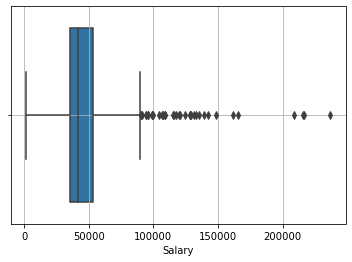

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


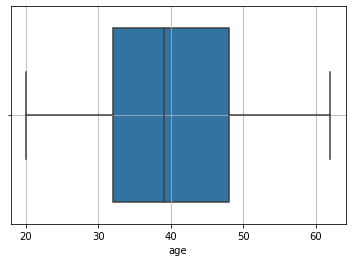

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


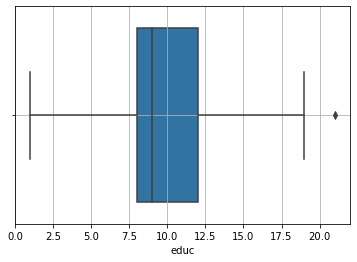

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


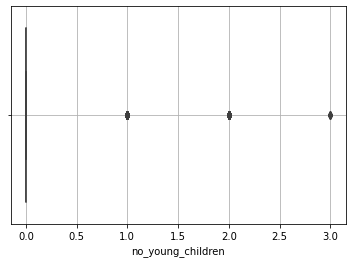

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


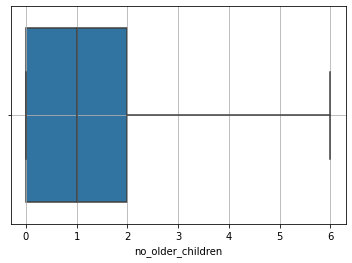

In [12]:
continous_cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in continous_cols:
    sns.boxplot(df[i],whis=2.0)
    plt.grid()
    plt.show();

Treating the outliers

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
lr,ur=remove_outlier(df['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])
print('')

lr,ur=remove_outlier(df['educ'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['educ']=np.where(df['educ']>ur,ur,df['educ'])
df['educ']=np.where(df['educ']<lr,lr,df['educ'])
print('')

lr,ur=remove_outlier(df['age'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['age']=np.where(df['age']>ur,ur,df['age'])
df['age']=np.where(df['age']<lr,lr,df['age'])
print('')

lr,ur=remove_outlier(df['no_young_children'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['no_young_children']=np.where(df['no_young_children']>ur,ur,df['no_young_children'])
df['no_young_children']=np.where(df['no_young_children']<lr,lr,df['no_young_children'])
print('')

lr,ur=remove_outlier(df['no_young_children'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['no_young_children']=np.where(df['no_young_children']>ur,ur,df['no_young_children'])
df['no_young_children']=np.where(df['no_young_children']<lr,lr,df['no_young_children'])
print('')



Lower Range : 8105.75 
Upper Range : 80687.75

Lower Range : 2.0 
Upper Range : 18.0

Lower Range : 8.0 
Upper Range : 72.0

Lower Range : 0.0 
Upper Range : 0.0

Lower Range : 0.0 
Upper Range : 0.0



C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


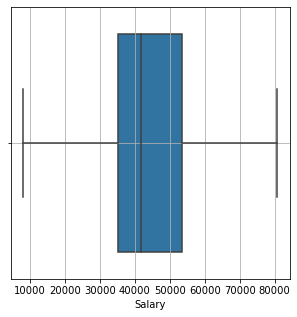

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


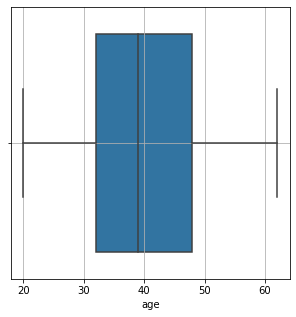

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


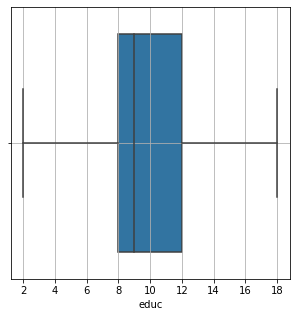

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


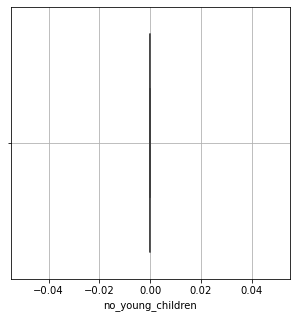

C:\Users\ahmed basha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


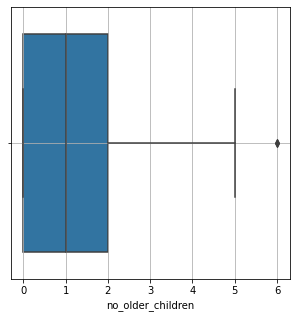

In [18]:
cont_cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cont_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

Countplot 

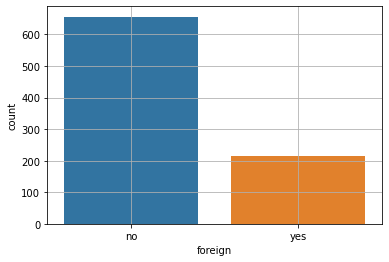

In [512]:
sns.countplot(df['foreign'])
plt.grid()
plt.show()

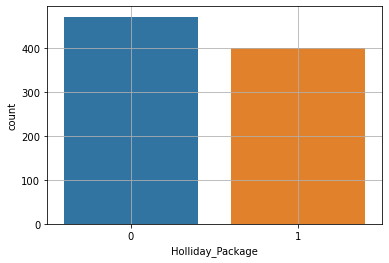

In [513]:
sns.countplot(df['Holliday_Package'])
plt.grid()
plt.show()

#### Bivarate Analysis 

Salary against Holiday_Package

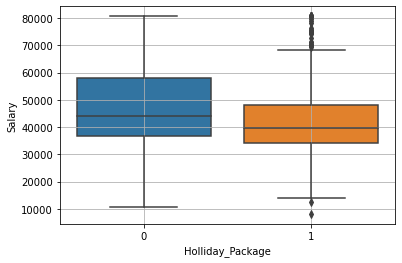

In [514]:
sns.boxplot(df['Holliday_Package'],df['Salary'])
plt.grid()
plt.show()

age against Holiday_Package

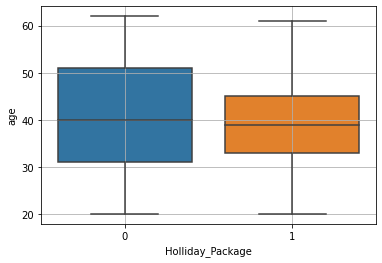

In [515]:
sns.boxplot(df['Holliday_Package'],df['age'])
plt.grid()
plt.show()

educ against Holiday_Package

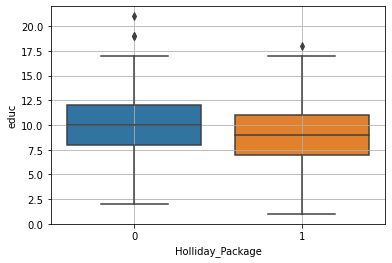

In [516]:
sns.boxplot(df['Holliday_Package'],df['educ'])
plt.grid()
plt.show()

no_young_children Vs Holiday_Package

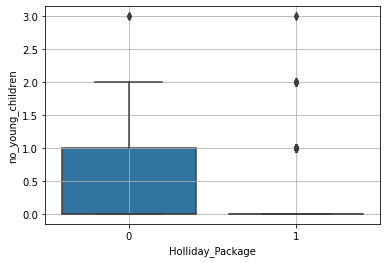

In [517]:
sns.boxplot(df['Holliday_Package'],df['no_young_children'])
plt.grid()
plt.show()

no_older_children Vs Holiday_Package

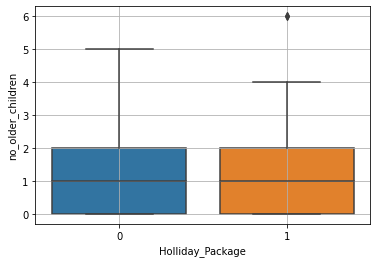

In [518]:
sns.boxplot(df['Holliday_Package'],df['no_older_children'])
plt.grid()
plt.show()

foreign Vs Holiday_Package

<function matplotlib.pyplot.show(close=None, block=None)>

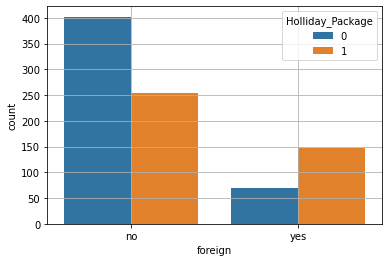

In [519]:
sns.countplot(df['foreign'],hue=df['Holliday_Package'])
plt.grid()
plt.show

#### Converting the Target Variable into Categorical

In [520]:
df['Holliday_Package'] = pd.Categorical(df['Holliday_Package']).codes

In [521]:
df['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(1)
memory usage: 41.9+ KB


In [523]:
# Creating the dummy variables for foregin variable.
df1 = pd.get_dummies(df, columns=['foreign'],drop_first=True)
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


#### Correlations.


In [524]:
df1.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
Holliday_Package,1.000000,-0.180214,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.180214,1.000000,0.047029,0.352726,-0.034360,0.121993,-0.239387
age,-0.092311,0.047029,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.352726,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.034360,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.121993,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign_yes,0.254096,-0.239387,-0.107148,-0.419678,0.085111,0.021317,1.000000


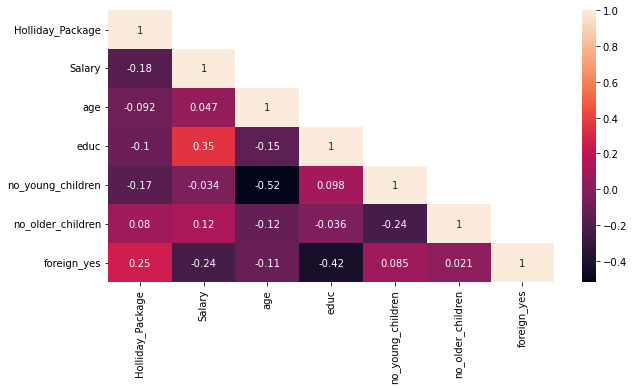

In [525]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True,mask=np.triu(df1.corr(),+1));

There is hardly any correlation between the variables

In [526]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.307339,3.036259,1.00,8.0,9.0,12.0,21.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00
foreign_yes,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


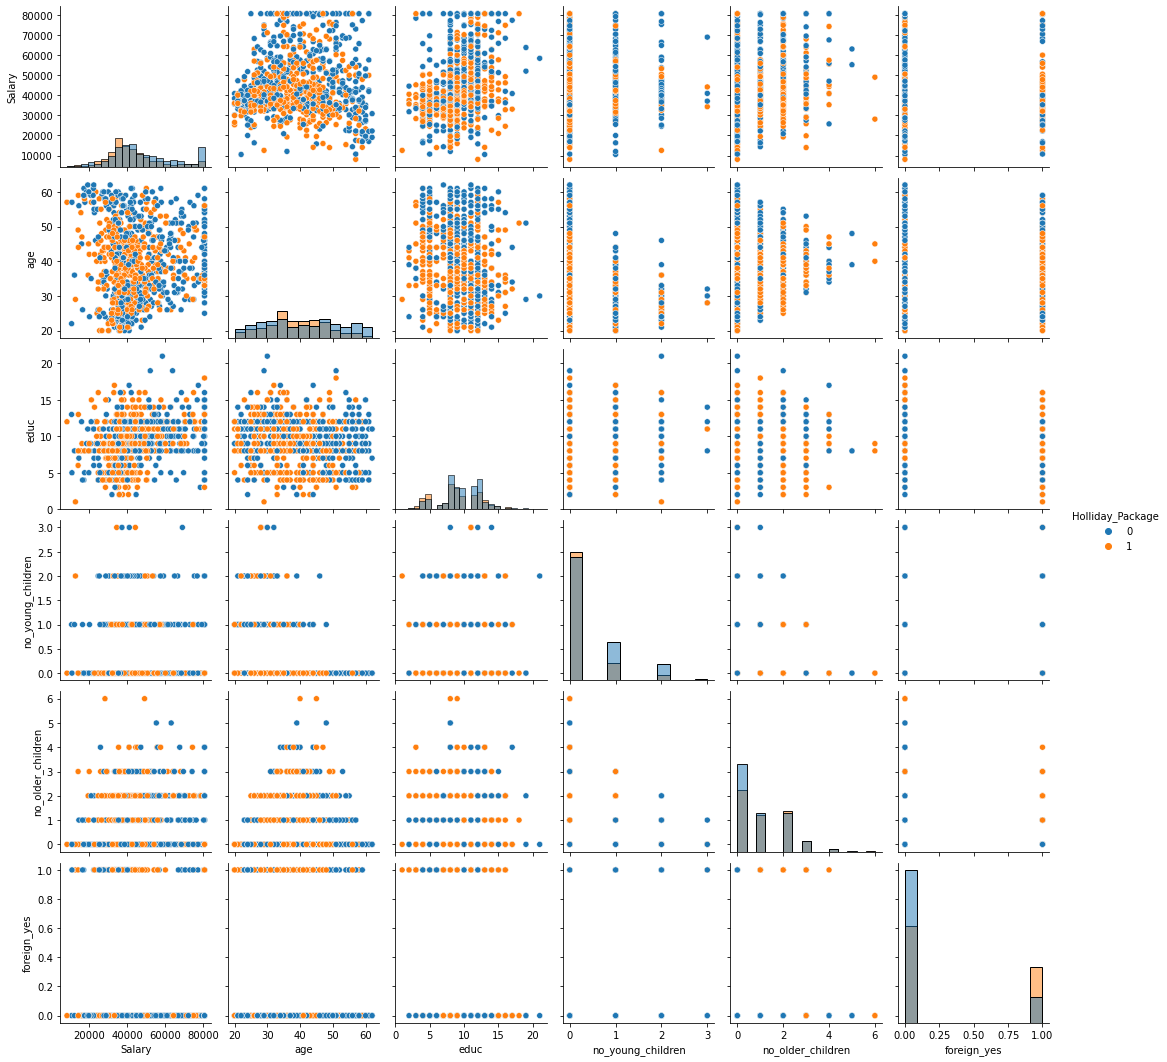

In [527]:
# Pairplot using sns
sns.pairplot(df1 ,diag_kind='hist' ,hue='Holliday_Package');

### Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.
Use Full Data to develop a logistic regression model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

In [550]:
df1.dtypes

Holliday_Package        int8
Salary               float64
age                    int64
educ                   int64
no_young_children      int64
no_older_children      int64
foreign_yes            uint8
dtype: object

In [565]:
df1.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign_yes'],
      dtype='object')

In [566]:
formula_1='Holliday_Package~+Salary+age+educ+no_young_children+no_older_children+foreign_yes'

In [569]:
Logistic_1 = sm.logit(formula=formula_1,data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.604108
         Iterations 6


In [570]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                  0.1244
Time:                        18:20:55   Log-Likelihood:                -526.78
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.138e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5432      0.559      4.550      0.000       1.448       3.639
Salary            -2.088e-05   5.26e-06     -3.970      0.000   -3.12e-05   -1.06e-05
age                  -0.0496      0.009     -5.491      0.000      -0.067      -0.032
educ                  0.0342      0.029      1.172      0.241      -0.023       0.091
no_young_children    -1.3287      0.180     -7.386      0.000      -1.681      -0.976
no_older_children    -0.0251      0.074     -0.341      0.733      -0.169       0.119
foreign_yes           1.3037      0.200      6.519      0.000       0.912       1.696
=====================================================================================
"""

Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [571]:
#check for Multicolinearity 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [572]:
vif_cal(input_data=df1[[ 'Holliday_Package','Salary','age','educ','no_young_children','no_older_children','foreign_yes']])

Holliday_Package  VIF =  1.19
Salary  VIF =  1.22
age  VIF =  1.62
educ  VIF =  1.41
no_young_children  VIF =  1.69
no_older_children  VIF =  1.19
foreign_yes  VIF =  1.34


##### Model 2 
Note : Threshold value considered is VIF < 1.5

In [575]:
formula_2='Holliday_Package~+Salary+educ+no_young_children+no_older_children+foreign_yes'

In [578]:
Logistic_2 = sm.logit(formula=formula_2,data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.622381
         Iterations 5


In [579]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                 0.09790
Time:                        18:28:17   Log-Likelihood:                -542.72
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.214e-24
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0723      0.323      0.224      0.823      -0.561       0.706
Salary            -2.325e-05   5.16e-06     -4.503      0.000   -3.34e-05   -1.31e-05
educ                  0.0654      0.028      2.312      0.021       0.010       0.121
no_young_children    -0.7949      0.140     -5.675      0.000      -1.069      -0.520
no_older_children     0.1029      0.068      1.502      0.133      -0.031       0.237
foreign_yes           1.3914      0.197      7.079      0.000       1.006       1.777
=====================================================================================
"""

##### Model 3
Note : Threshold value considered is VIF < 1.5

In [580]:
formula_3='Holliday_Package~+Salary+educ+no_young_children+foreign_yes'

In [581]:
Logistic_3 = sm.logit(formula=formula_3,data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.623677
         Iterations 5


In [582]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                 0.09602
Time:                        18:30:07   Log-Likelihood:                -543.85
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 4.807e-24
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1467      0.319      0.459      0.646      -0.479       0.773
Salary            -2.213e-05   5.09e-06     -4.346      0.000   -3.21e-05   -1.21e-05
educ                  0.0639      0.028      2.265      0.023       0.009       0.119
no_young_children    -0.8367      0.137     -6.093      0.000      -1.106      -0.568
foreign_yes           1.4043      0.196      7.148      0.000       1.019       1.789
=====================================================================================
"""

In [583]:
#check for Multicolinearity 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [584]:
vif_cal(input_data=df1[[ 'Holliday_Package','Salary','educ','no_young_children','foreign_yes']])

Holliday_Package  VIF =  1.14
Salary  VIF =  1.19
educ  VIF =  1.36
no_young_children  VIF =  1.08
foreign_yes  VIF =  1.33


In [585]:
#Using the last best model 
Logistic_3_pred = model_3.fittedvalues
Logistic_3_pred

0      0.417201
1      0.376106
2      0.342029
3      0.383124
4      0.410183
         ...   
867    0.718147
868    0.621058
869    0.686810
870    0.671573
871    0.612839
Length: 872, dtype: float64

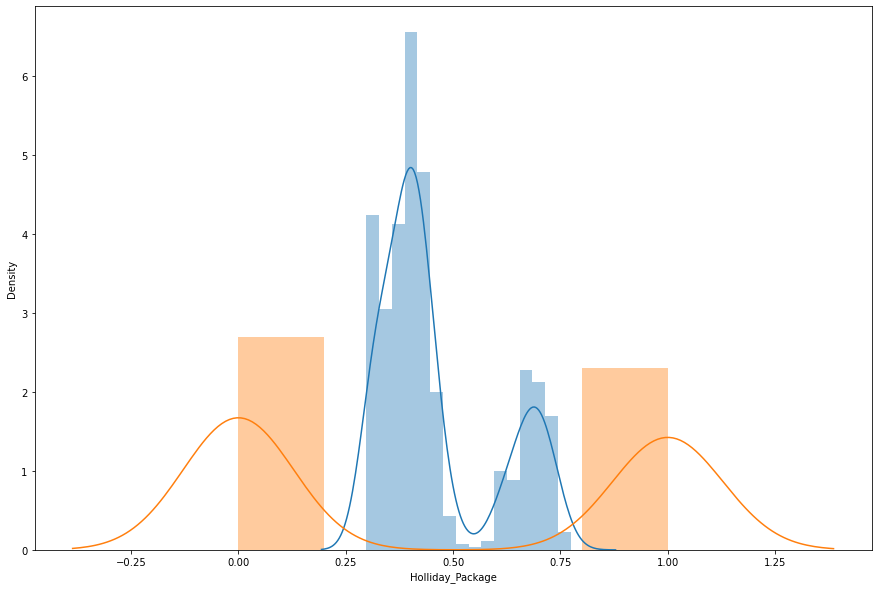

In [586]:
plt.figure(figsize = (15,10))
sns.distplot(model_3.fittedvalues)
sns.distplot(df1['Holliday_Package']);

### Split the data into training (70%) and test (30%). Build the various iterations of the Logistic Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.
If prediction accuracy of the full scholarship is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (II) to compare accuracy in training and test sets. Compare the final model of Part (II) and the proposed one in Part (III). Which model provides the most accurate prediction? If the model found in Part (II) is different from the proposed model in Part (III), give an explanation.

In [554]:
X= df1.drop('Holliday_Package',axis=1)
Y=df1['Holliday_Package']

In [605]:
Train,Test = train_test_split(df1,test_size=0.3,random_state=1,stratify=df1['Holliday_Package'])

In [607]:
Train.shape

(610, 7)

In [608]:
Test.shape

(262, 7)

In [610]:
Train['Holliday_Package'].value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [609]:
Test['Holliday_Package'].value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

#### Build the models 1,2 and 3 on the training data, check the accuracy score of each of the models on the training data and use those models to predict the classes and the corresponding probabilities on the test data.

In [611]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

#### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [613]:
Logistic_1 = LR.fit(Train[['Salary','age','educ','no_young_children','no_older_children','foreign_yes']],Train['Holliday_Package'])

In [614]:
print('Accuracy Score of Model 1:',Logistic_1.score(Train[['Salary','age','educ','no_young_children','no_older_children','foreign_yes']],Train['Holliday_Package']))

Accuracy Score of Model 1: 0.6672131147540984


#### Model 1 - Predicting the classes and the probabilities on the Test Data

In [615]:
model_1_test_class = Logistic_1.predict(Test[['Salary','age','educ','no_young_children','no_older_children','foreign_yes']])
model_1_test_probabilities = Logistic_1.predict_proba(Test[['Salary','age','educ','no_young_children','no_older_children','foreign_yes']])

#### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [616]:
Logistic_2 = LR.fit(Train[['Salary','educ','no_young_children','no_older_children','foreign_yes']],Train['Holliday_Package'])

In [618]:
print('Accuracy Score of Model 2:',Logistic_2.score(Train[['Salary','educ','no_young_children','no_older_children','foreign_yes']],Train['Holliday_Package']))

Accuracy Score of Model 2: 0.6491803278688525


#### Model 2 - Predicting the classes and the probabilities on the Test Data

In [619]:
model_2_test_class = Logistic_2.predict(Test[['Salary','educ','no_young_children','no_older_children','foreign_yes']])
model_2_test_probabilities = Logistic_2.predict_proba(Test[['Salary','educ','no_young_children','no_older_children','foreign_yes']])

#### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [620]:
Logistic_3 = LR.fit(Train[['Salary','educ','no_young_children','foreign_yes']],Train['Holliday_Package'])

In [621]:
print('Accuracy Score of Model 3:',Logistic_3.score(Train[['Salary','educ','no_young_children','foreign_yes']],Train['Holliday_Package']))

Accuracy Score of Model 3: 0.6344262295081967


#### Model 3 - Predicting the classes and the probabilities on the Test Data

In [622]:
model_3_test_class = Logistic_3.predict(Test[['Salary','educ','no_young_children','foreign_yes']])
model_3_test_probabilities = Logistic_3.predict_proba(Test[['Salary','educ','no_young_children','foreign_yes']])

#### Evaluate the three models on the test data using the various statistics of the confusion matrix. 

Confusion Matrix summary statistics Evaluation on the Test Data

In [625]:
rcParams['figure.figsize'] = 15,4

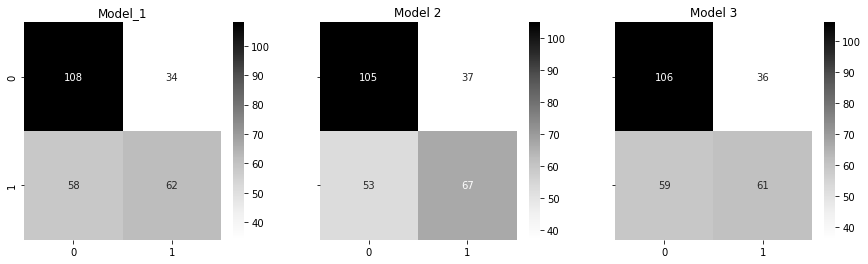

In [626]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package'],model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');


In [627]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holliday_Package'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holliday_Package'],model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holliday_Package'],model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Model 1
True Negative: 108 
False Positives: 34 
False Negatives: 58 
True Positives: 62 


Model 2
True Negative: 105 
False Positives: 37 
False Negatives: 53 
True Positives: 67 


Model 3
True Negative: 106 
False Positives: 36 
False Negatives: 59 
True Positives: 61


In [628]:
print('Model 1')
print(metrics.classification_report(Test['Holliday_Package'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Holliday_Package'],model_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['Holliday_Package'],model_3_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 

Model 2
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       142
           1       0.64      0.56      0.60       120

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 

Model 3
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       142
           1       0.63      0.51      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63   

#### Check the summary statistics of the AUC-ROC curve for all the three Logistic Regression Models built. This is for the test data.

In [629]:
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.71496


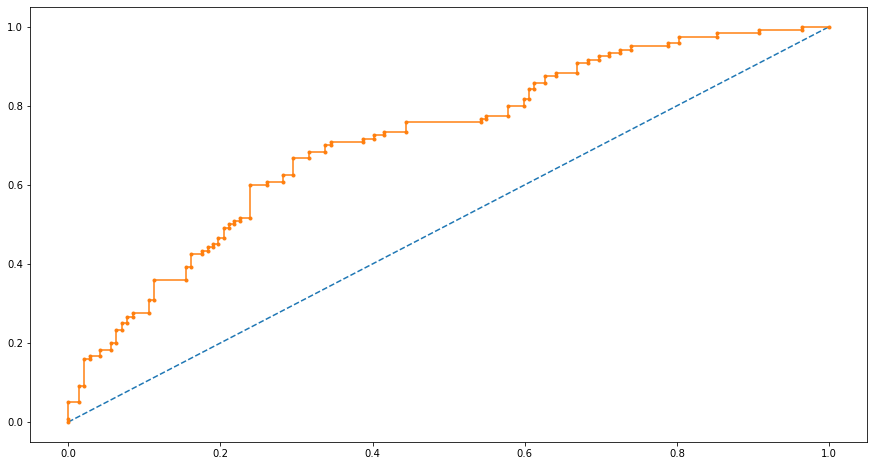

Model 2 AUC: 0.70628


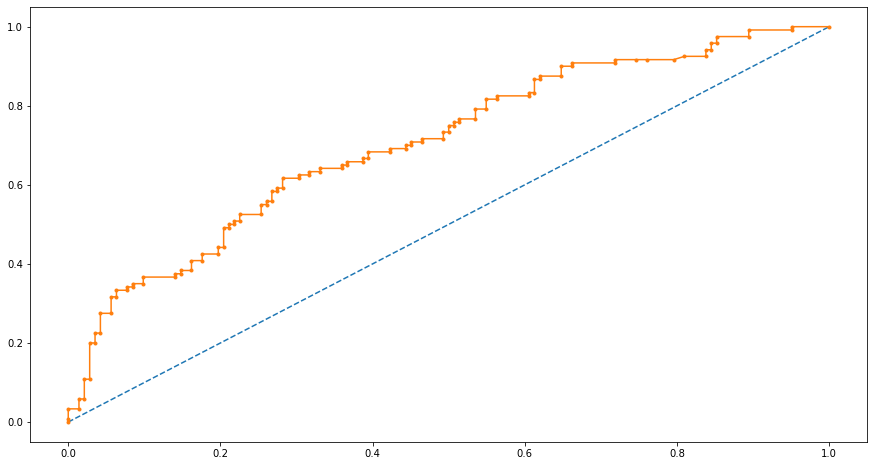

Model 3 AUC: 0.70120


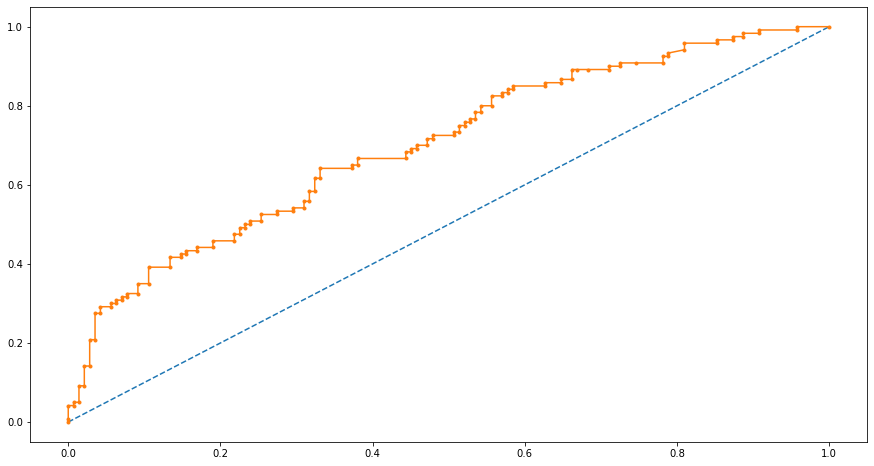

In [632]:
# AUC and ROC for the model 1


auc = metrics.roc_auc_score(Test['Holliday_Package'],model_1_test_probabilities[:, 1])
print('Model 1 AUC: %.5f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(Test['Holliday_Package'],model_1_test_probabilities[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


# AUC and ROC for the model 2

auc = metrics.roc_auc_score(Test['Holliday_Package'],model_2_test_probabilities[:, 1])
print('Model 2 AUC: %.5f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(Test['Holliday_Package'],model_2_test_probabilities[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()



# AUC and ROC for the model 3

auc = metrics.roc_auc_score(Test['Holliday_Package'],model_3_test_probabilities[:, 1])
print('Model 3 AUC: %.5f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(Test['Holliday_Package'],model_3_test_probabilities[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
